### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the quality of milk. You have been provided with a dataset named **`"milk_quality_data.csv"`**, which includes various parameters that affect milk quality. The dataset comprises the following columns:

- `ph:` The pH level of the milk.
- `temperature:` The temperature of the milk.
- `taste:` Whether the taste is good or bad (1 for good, 0 for bad).
- `odor:` Whether the odor is good or bad (1 for good, 0 for bad).
- `fat:` Whether the fat content is optimal or not (1 for optimal, 0 for not).
- `turbidity:` Whether the turbidity is high or low (1 for high, 0 for low).
- `colour:` The color value of the milk.
- `grade:` The quality of the milk (low, medium, high).
  
Your task is to use this dataset to build and evaluate machine learning models to predict the grade of the milk based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using different algorithms, including logistic regression, decision tree, gradient boosting, and XGBoost.

**Dataset credits:** shrijayan (https://www.kaggle.com/datasets/cpluzshrijayan/milkquality/data)

**Import Necessary Libraries**

In [3]:
#Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

### Task 1: Data Preparation and Exploration

1. Import the data from the `"milk_quality_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Encode the target variable `grade` by mapping it to numbers `(low = 0, medium = 1, high = 2)`.
6. Visualize the distribution of key features `(ph, temperature)` using histograms.

In [4]:
# Step 1: Import the data from the "milk_quality_data.csv" file and store it in a variable 'df'
df = pd.read_csv("milk_quality_data.csv")

# Step 2: Display the number of rows and columns in the dataset
print(df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
df.head()

(1059, 8)


,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
# Step 4: Check for any missing values in the dataset and handle them appropriately
df.isnull().sum()

ph             0
temperature    0
taste          0
odor           0
fat            0
turbidity      0
colour         0
grade          0
dtype: int64

In [6]:
# Step 5: Encode the target variable 'grade' by mapping it to numbers ('low' = 0, 'medium' = 1, 'high' = 2)
df['grade'] = df['grade'].map({'low' : 0, 'medium' : 1, 'high' : 2})

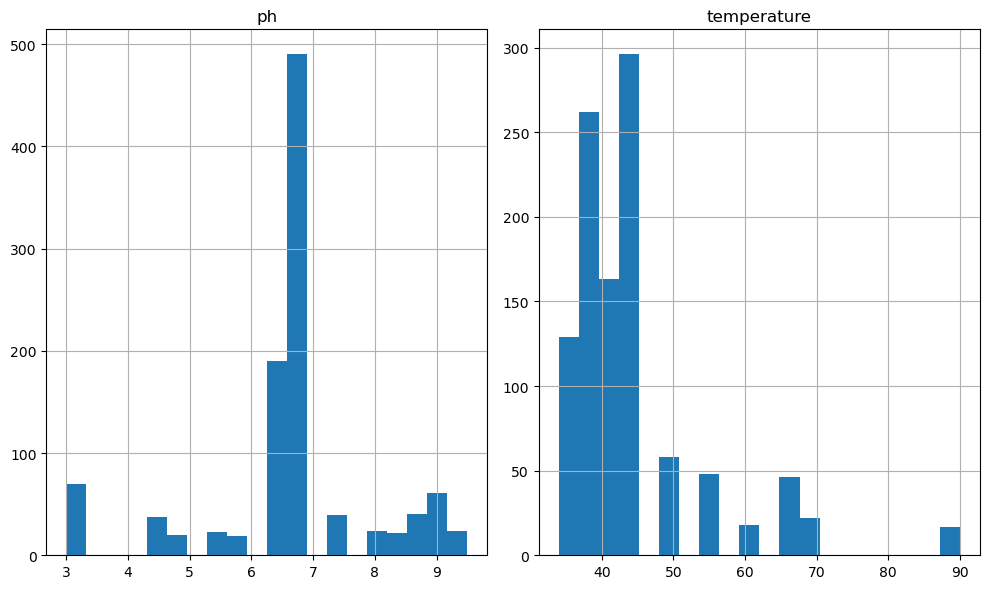

In [13]:
# Step 6: Visualize the distribution of key features ('ph', 'temperature') using histograms
df[['ph', 'temperature']].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()


### Task 2: Model Training Using Basic Models

1. Select the features `(ph, temperature, taste, odor, fat, turbidity, colour)` and the target variable `(grade)` for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train a Logistic Regression model using the training data.
4. Print the model's accuracy score on test data.
5. Initialize and train a Decision Tree Classifier using the training data.
6. Print the model's accuracy score on test data.

In [14]:
# Step 1: Select the features and target variable for modeling
X = df.drop('grade',axis = 1)
y = df['grade']


# Step 2: Split the data into training and test sets with a test size of 30%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [18]:
# Step 3: Initialize and train a Logistic Regression model using the training data
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

y_pred= model_lr.predict(X_test)
# Step 4: Print the model's accuracy score on test data.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.6981132075471698


In [20]:
# Step 5: Initialize and train a Decision Tree Classifier using the training data
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

y_pred_dt= model_dt.predict(X_test)

# Step 6: Print the model's accuracy score on test data.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_dt))

0.9937106918238994


### Task 3: Model Training Using Advanced Models

1. Initialize and train a Gradient Boosting Classifier with 50 estimators using the training data.
2. Print the model's accuracy score on test data.
3. Initialize and train an XGBoost Classifier with 50 estimators using the training data.
4. Print the model's accuracy score on test data.

In [21]:
# Step 1: Initialize and train a Gradient Boosting Classifier with 50 estimators using the training data
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train,y_train)

y_pred_gb= model_gb.predict(X_test)

# Step 2: Print the model's accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_gb))

0.9937106918238994


In [23]:
# Step 3: Initialize and train an XGBoost Classifier with 50 estimators using the training data
model_xgb = XGBClassifier(n_estimators=50)
model_xgb.fit(X_train,y_train)

y_pred_xgb= model_xgb.predict(X_test)

# Step 4: Print the model's accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_xgb))

0.9968553459119497


### Task 4: Experiment with Hyperparameters in XGBoost

1. Train the XGBoost model with the following parameters
    - n_estimators=100
    - max_depth=5
    - learning_rate=0.1
    - colsample_bytree=0.5.

Learn about these parameters here: [XgboostClassifier Parameters](https://xgboost.readthedocs.io/en/stable/parameter.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------

2. Evaluate the model's performance using accuracy score and print it.
3. Print the classification report and confusion matrix for the model.

In [24]:
# Step 1: Train the XGBoost model with n_estimators=100, max_depth=5, learning_rate=0.1, colsample_bytree=0.5
model_xgb = XGBClassifier(n_estimators=100,max_depth=5, learning_rate=0.1, colsample_bytree=0.5)
model_xgb.fit(X_train,y_train)

y_pred_xgb= model_xgb.predict(X_test)

# Step 4: Print the model's accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_xgb))

# Step 2: Evaluate the model's performance using accuracy score and print it


0.9968553459119497


In [25]:
# Step 3: Print the classification report and confusion matrix for the model

report= classification_report(y_test,y_pred_xgb)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       0.99      1.00      1.00       127
           2       1.00      1.00      1.00        76

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



In [27]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred_xgb)
print(cm)

[[114   1   0]
 [  0 127   0]
 [  0   0  76]]
